In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.utils import shuffle
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

# **Reading Data**

In [ ]:
df = pd.read_csv('/content/CarPrice_Assignment.csv')

# **Data Exploration**

In [ ]:
# Show a sample of data

df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [ ]:
# shape of data

df.shape

(205, 26)

In [ ]:
# Coulumn names

df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
# Information about the data ..

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# Description of data ..

df.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [ ]:
# Check for missing values ..

df.isnull().sum().sum()

0

In [ ]:
# Check for duplicate values ..

df.duplicated().sum()

0

In [ ]:
# Cardinality check ..

df.nunique().sort_values()

fueltype              2
aspiration            2
doornumber            2
enginelocation        2
drivewheel            3
carbody               5
symboling             6
enginetype            7
cylindernumber        7
fuelsystem            8
peakrpm              23
citympg              29
highwaympg           30
compressionratio     32
stroke               37
boreratio            38
carwidth             44
enginesize           44
carheight            49
wheelbase            53
horsepower           59
carlength            75
CarName             147
curbweight          171
price               189
car_ID              205
dtype: int64

# **Data Cleaning**

In [ ]:
# Delete an unimportant column in the data ..

df.drop('car_ID', axis=1, inplace=True)

In [ ]:
# show data after delete unimportant column

df.head()

symboling                   CarName fueltype aspiration doornumber  \
0          3        alfa-romero giulia      gas        std        two   
1          3       alfa-romero stelvio      gas        std        two   
2          1  alfa-romero Quadrifoglio      gas        std        two   
3          2               audi 100 ls      gas        std       four   
4          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  ...  \
0  convertible        rwd          front       88.6      168.8  ...   
1  convertible        rwd          front       88.6      168.8  ...   
2    hatchback        rwd          front       94.5      171.2  ...   
3        sedan        fwd          front       99.8      176.6  ...   
4        sedan        4wd          front       99.4      176.6  ...   

   enginesize  fuelsystem  boreratio stroke compressionratio  horsepower  \
0         130        mpfi       3.47   2.68              9.0         111   
1         130        mpfi       3.47   2.68              9.0         111   
2         152        mpfi       2.68   3.47              9.0         154   
3         109        mpfi       3.19   3.40             10.0         102   
4         136        mpfi       3.19   3.40              8.0         115   

  peakrpm  citympg  highwaympg    price  
0    5000       21          27  13495.0  
1    5000       21          27  16500.0  
2    5000       19          26  16500.0  
3    5500       24          30  13950.0  
4    5500       18          22  17450.0  

[5 rows x 25 columns]

In [ ]:
# shuffling Data ..

df = shuffle(df)

In [ ]:
# show data after shuffling

df.head()

symboling                         CarName fueltype aspiration doornumber  \
103          0                     nissan otti      gas        std       four   
20           0             chevrolet vega 2300      gas        std       four   
161          0                  toyota corolla      gas        std       four   
178          3         toyota corolla liftback      gas        std        two   
121          1  plymouth satellite custom (sw)      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  ...  \
103      sedan        fwd          front      100.4      184.6  ...   
20       sedan        fwd          front       94.5      158.8  ...   
161  hatchback        fwd          front       95.7      166.3  ...   
178  hatchback        rwd          front      102.9      183.5  ...   
121      sedan        fwd          front       93.7      167.3  ...   

     enginesize  fuelsystem  boreratio stroke compressionratio  horsepower  \
103         181        mpfi       3.43   3.27              9.0         152   
20           90        2bbl       3.03   3.11              9.6          70   
161          98        2bbl       3.19   3.03              9.0          70   
178         171        mpfi       3.27   3.35              9.3         161   
121          90        2bbl       2.97   3.23              9.4          68   

    peakrpm  citympg  highwaympg    price  
103    5200       19          25  13499.0  
20     5400       38          43   6575.0  
161    4800       28          34   8358.0  
178    5200       20          24  16558.0  
121    5500       31          38   6692.0  

[5 rows x 25 columns]

# **Data Analysis & Processing**

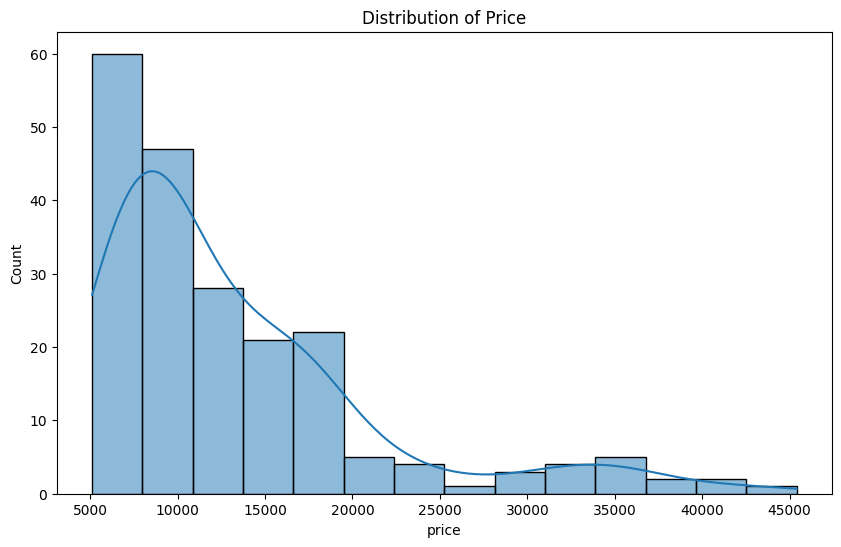

In [ ]:
# Distribution of Price

plt.figure(figsize=(10, 6))
sns.histplot(data = df, x ='price', kde=True)
plt.title('Distribution of Price')
plt.show()

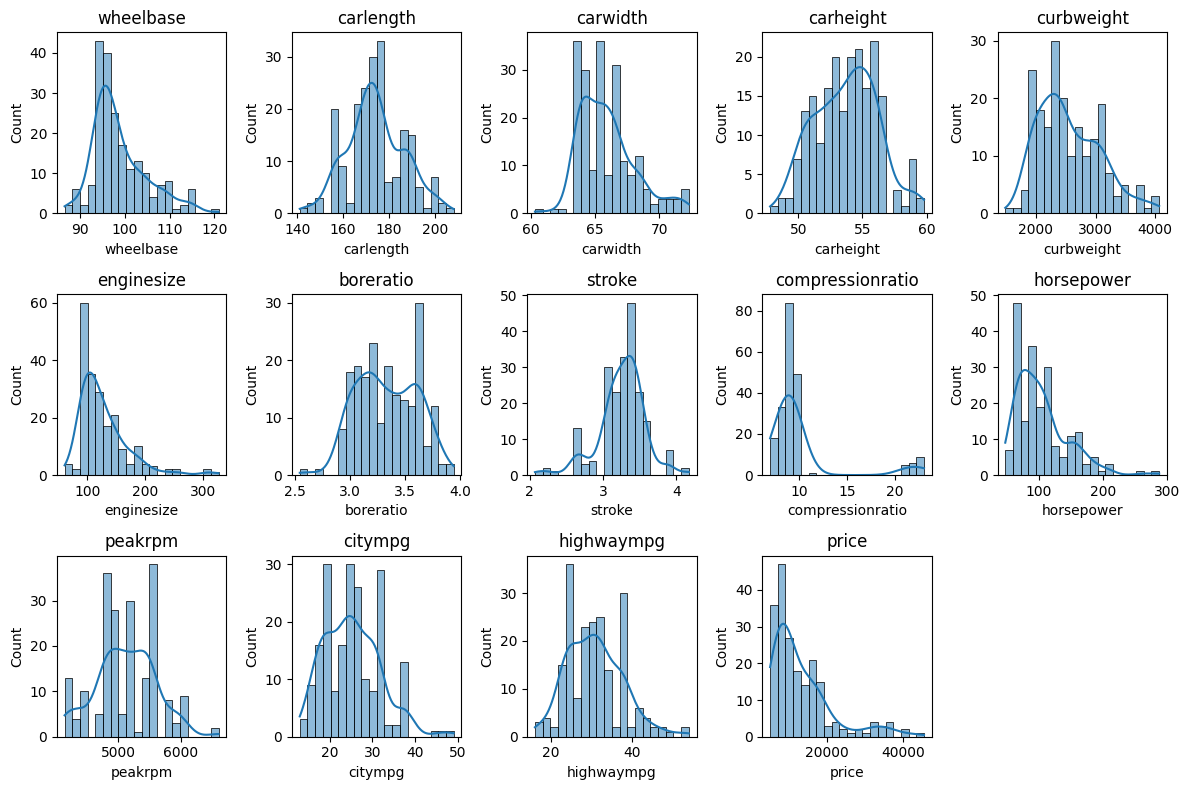

In [ ]:
# Distribution of Numerical Features ..

numerical_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                      'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                      'peakrpm', 'citympg', 'highwaympg', 'price']

plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

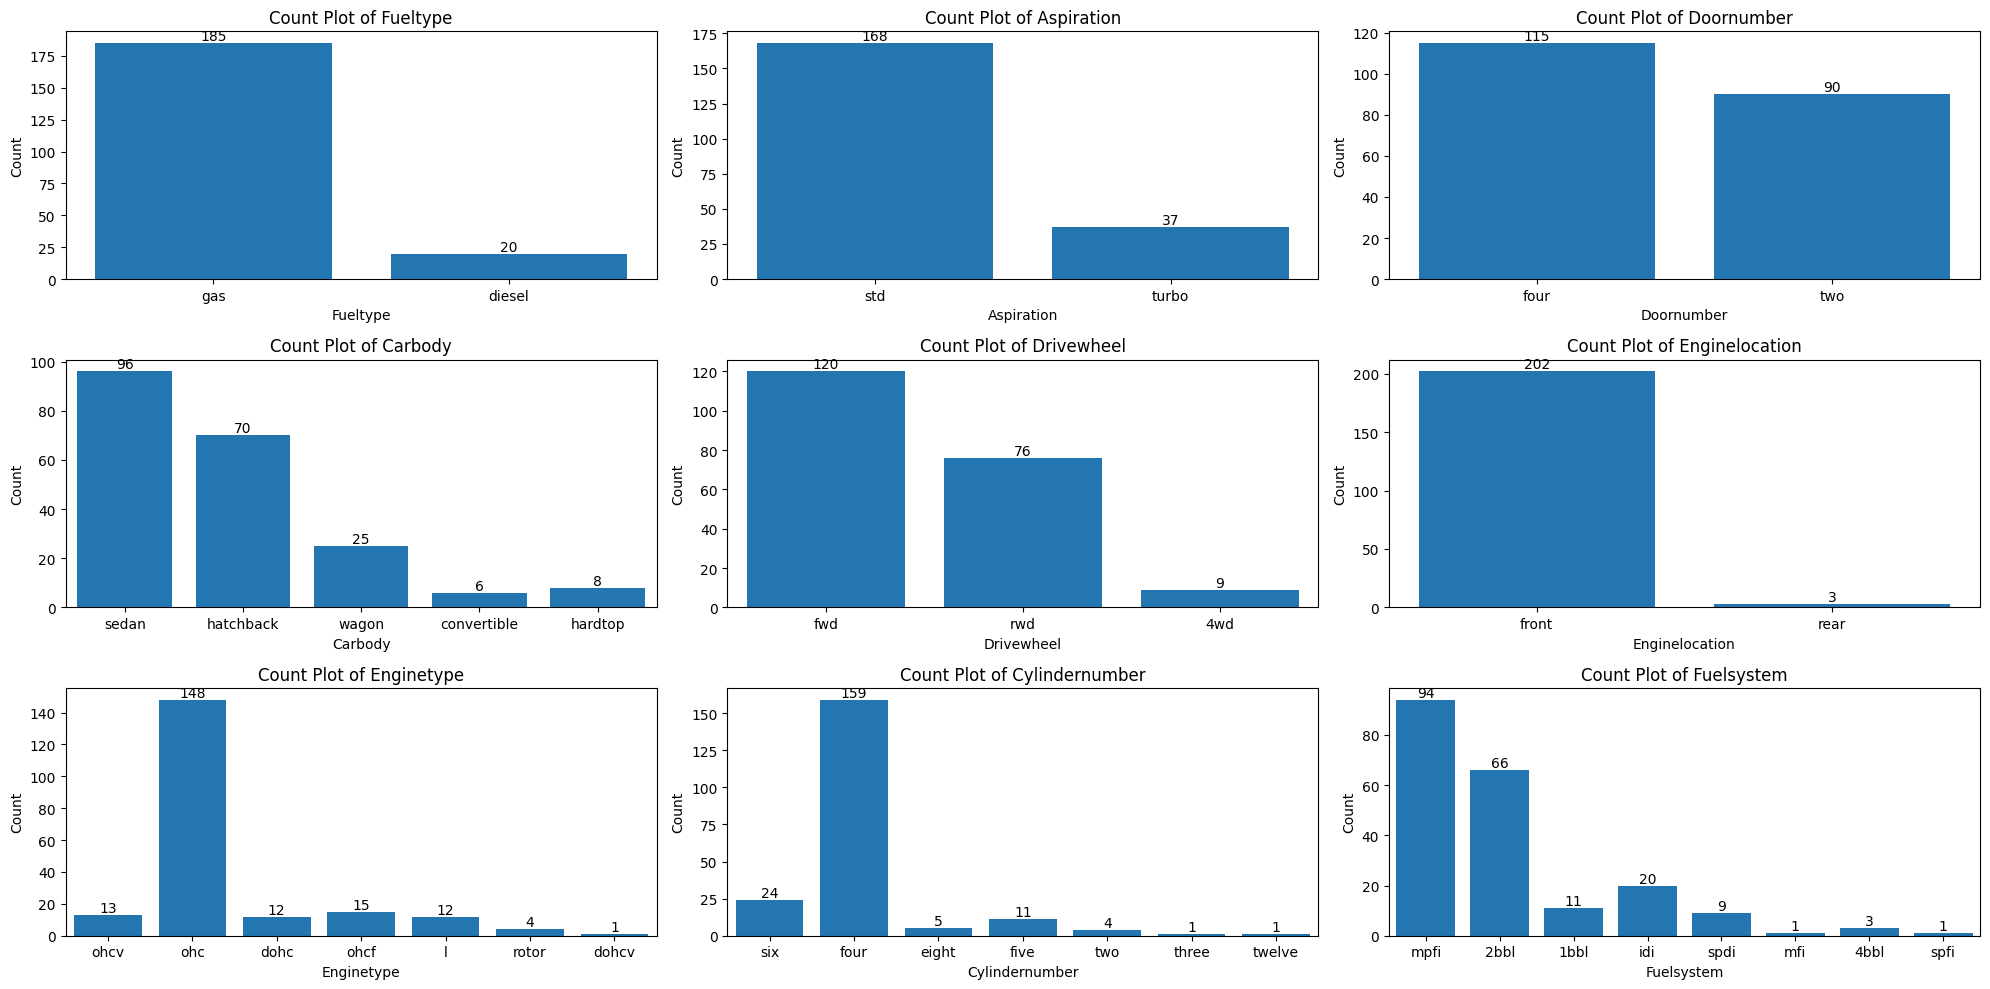

In [ ]:
# Define the list of categorical columns to analyze ..

categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

# Create subplots ..

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))

# Flatten the axes array for easy indexing ..
axes = axes.ravel()

# Loop through each categorical column ..

for i, column in enumerate(categorical_columns):
    sns.countplot(x=df[column], data=df, ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')

# Adjust layout and show plots ..

plt.tight_layout()
plt.show()

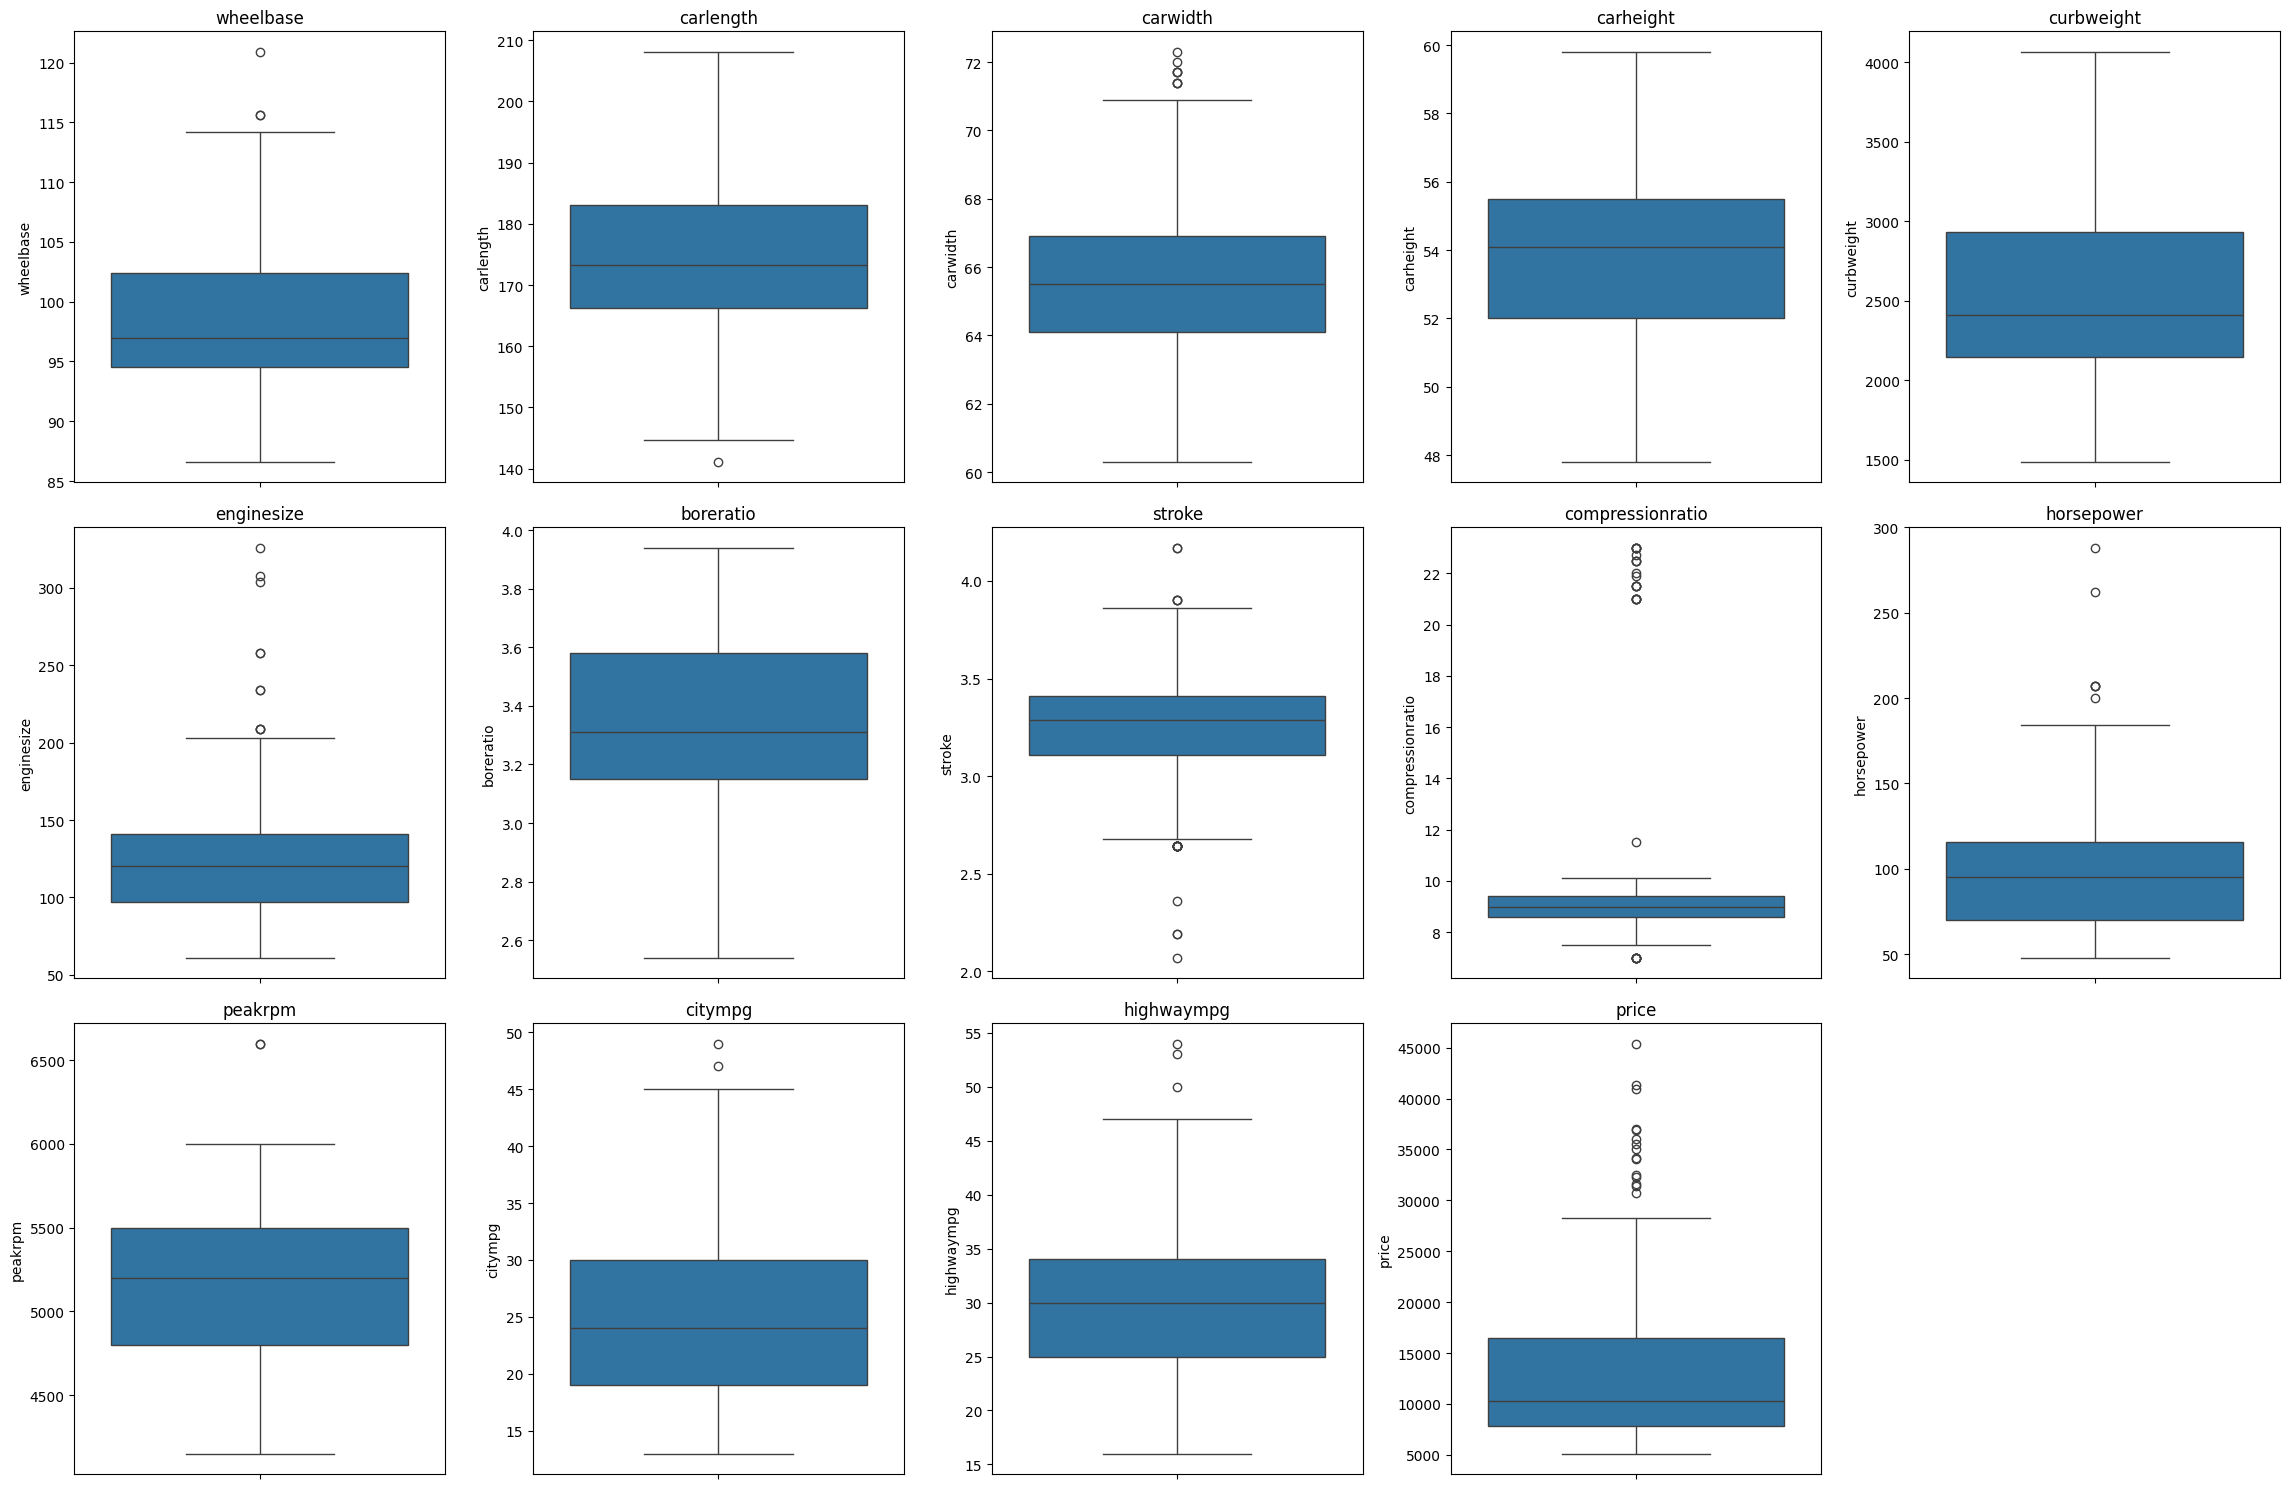

In [ ]:
# boxplot all numerical features

plt.figure(figsize=(23, 15))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.boxplot(data=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

In [ ]:
# detect outliers ..

def detect_outliers_iqr(data, column):

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data.index[(data[column] < lower_bound) | (data[column] > upper_bound)].tolist()

    return outliers

In [ ]:
# show outliers in all numerical features ..

for feature in numerical_features:
    outliers = detect_outliers_iqr(df, feature)
    print(f"Number of outliers in {feature}: {len(outliers)}")

Number of outliers in wheelbase: 3
Number of outliers in carlength: 1
Number of outliers in carwidth: 8
Number of outliers in carheight: 0
Number of outliers in curbweight: 0
Number of outliers in enginesize: 10
Number of outliers in boreratio: 0
Number of outliers in stroke: 20
Number of outliers in compressionratio: 28
Number of outliers in horsepower: 6
Number of outliers in peakrpm: 2
Number of outliers in citympg: 2
Number of outliers in highwaympg: 3
Number of outliers in price: 15


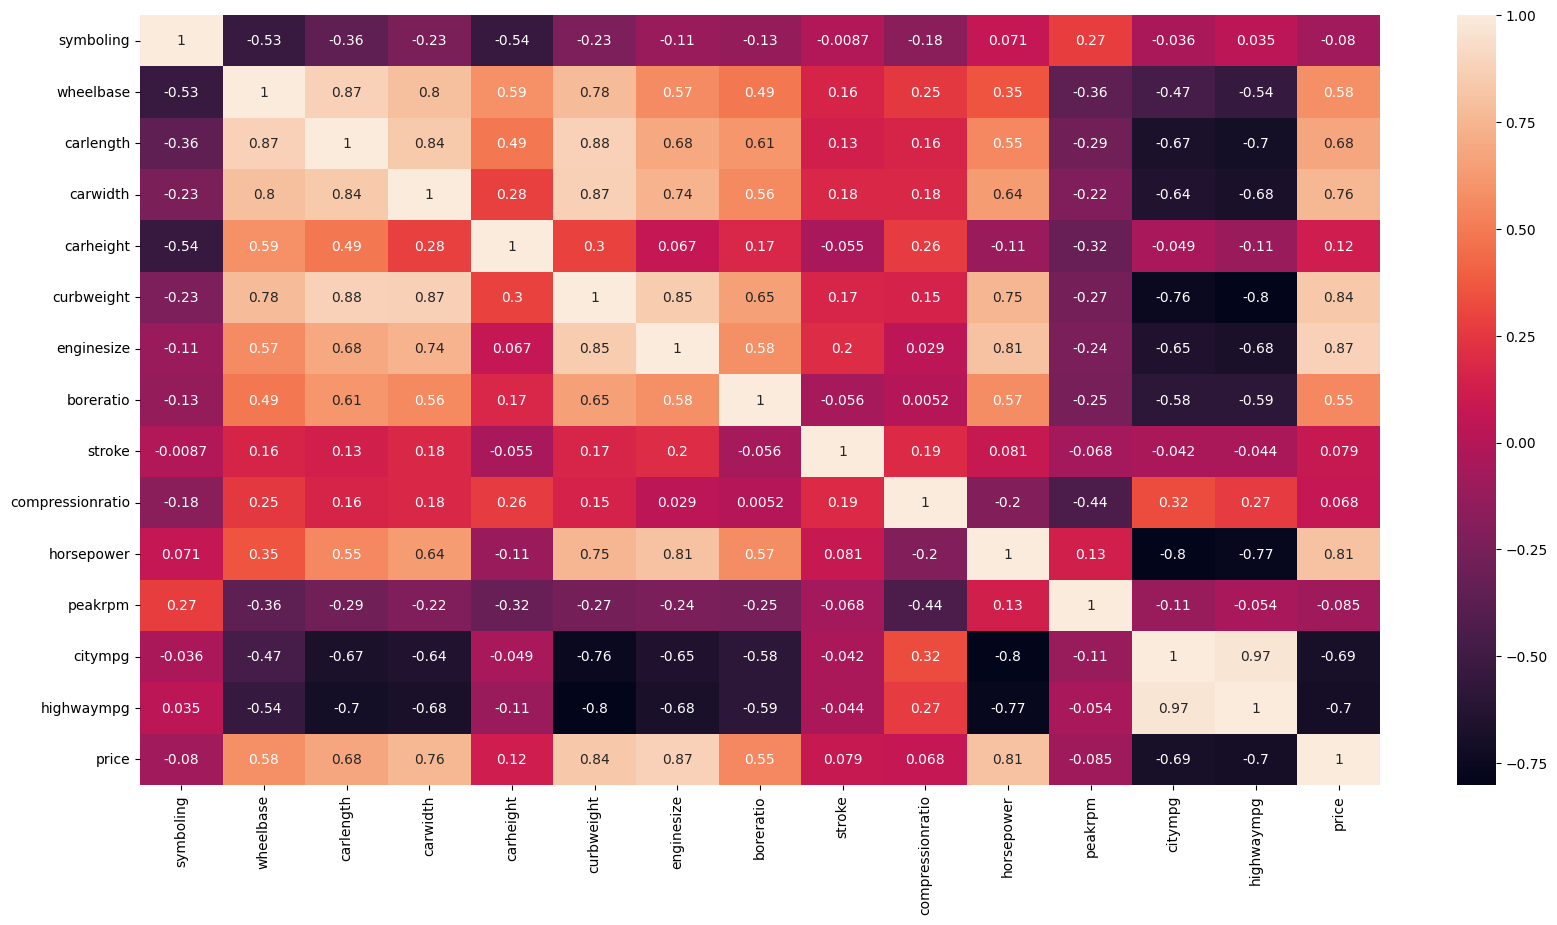

In [ ]:
# Select only numerical columns for correlation calculation

numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(20,10))
sns.heatmap(numerical_df.corr(), annot=True)
plt.show()

In [ ]:
# correlation between features and target
numerical_df.corr()['price'].sort_values(ascending=False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

# **Data Encoding**

In [ ]:
def encode_features(df):
    for column in df.columns:
        if df[column].dtype == type(object):
            le = LabelEncoder()
            df[column] = le.fit_transform(df[column])
    return df

In [ ]:
# show data after encoding

df = encode_features(df)
df.head()

symboling  CarName  fueltype  aspiration  doornumber  carbody  \
103          0       80         1           0           0        3   
20           0       26         1           0           0        3   
161          0      115         1           0           0        2   
178          3      118         1           0           1        2   
121          1       93         1           0           0        3   

     drivewheel  enginelocation  wheelbase  carlength  ...  enginesize  \
103           1               0      100.4      184.6  ...         181   
20            1               0       94.5      158.8  ...          90   
161           1               0       95.7      166.3  ...          98   
178           2               0      102.9      183.5  ...         171   
121           1               0       93.7      167.3  ...          90   

     fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  \
103           5       3.43    3.27               9.0         152     5200   
20            1       3.03    3.11               9.6          70     5400   
161           1       3.19    3.03               9.0          70     4800   
178           5       3.27    3.35               9.3         161     5200   
121           1       2.97    3.23               9.4          68     5500   

     citympg  highwaympg    price  
103       19          25  13499.0  
20        38          43   6575.0  
161       28          34   8358.0  
178       20          24  16558.0  
121       31          38   6692.0  

[5 rows x 25 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 103 to 111
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    int64  
 2   fueltype          205 non-null    int64  
 3   aspiration        205 non-null    int64  
 4   doornumber        205 non-null    int64  
 5   carbody           205 non-null    int64  
 6   drivewheel        205 non-null    int64  
 7   enginelocation    205 non-null    int64  
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    int64  
 14  cylindernumber    205 non-null    int64  
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    int64  
 17  

# **Splitting training and test data**

In [ ]:
x = df.drop(columns=['price'])
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((164, 24), (41, 24), (164,), (41,))

# **Normalization**

In [ ]:
# robust scaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# **Helpers**

In [ ]:
def evaluate_all_models(models, X_train_scaled, X_test_scaled, y_train, y_test):
    results = {}
    for name, model in models.items():
        # Fit model
        model.fit(X_train_scaled, y_train)

        # Predict & score - train set
        y_pred_train = model.predict(X_train_scaled)
        r2_train = r2_score(y_train, y_pred_train)
        mae_train = mean_absolute_error(y_train, y_pred_train)
        mse_train = mean_squared_error(y_train, y_pred_train)

        # Predict & score - test set
        y_pred_test = model.predict(X_test_scaled)
        r2_test = r2_score(y_test, y_pred_test)
        mae_test = mean_absolute_error(y_test, y_pred_test)
        mse_test = mean_squared_error(y_test, y_pred_test)

        # Store results
        results[name] = {
            'R2 Train': r2_train,
            'R2 Test': r2_test,

            'MAE Train': mae_train,
            'MAE Test': mae_test,

            'MSE Train': mse_train,
            'MSE Test': mse_test,

            'MAPE Train': mean_absolute_percentage_error(y_train, y_pred_train),
            'MAPE Test': mean_absolute_percentage_error(y_test, y_pred_test),

            'RMSE Train': np.sqrt(mse_train),
            'RMSE Test': np.sqrt(mse_test),
        }
    return results


# **Regression Models**

# Linear Regression

In [ ]:
# Create a pipeline that includes RobustScaler and LinearRegression model ...

pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('regressor', LinearRegression())
])

In [ ]:
# Define the parameter search grid to determine whether or not the linear regression model should include the intercept ...

param_grid = {
    'regressor__fit_intercept': [True, False],
    }

In [ ]:
# Implement Grid Search using pipeline and param_grid With cross-validation ...

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

In [ ]:
# Regression model training ...

grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('regressor', LinearRegression())]),
             param_grid={'regressor__fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [ ]:
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

best_model = grid_search.best_estimator_

Best parameters: {'regressor__fit_intercept': True}


In [ ]:
scores = cross_val_score(grid_search.best_estimator_, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-validation scores: {scores}')

Cross-validation scores: [ -9106701.04395908 -15085978.31145971 -14763127.44545535
 -17029406.35034474 -10164498.6079509 ]


In [ ]:
# Retrieve the best estimator model found by GridSearchCV ...

lr_model = grid_search.best_estimator_

In [ ]:
y_pred =lr_model.predict(X_test_scaled)

In [ ]:
# Evaluate the performance of the 'Linear Regression' model ...

evaluate_all_models({'Linear Regression': lr_model}, X_train_scaled, X_test_scaled, y_train, y_test)

{'Linear Regression': {'R2 Train': 0.8818265630688755,
  'R2 Test': 0.927263693931683,
  'MAE Train': 1937.5547900868974,
  'MAE Test': 1836.9503145444335,
  'MSE Train': 6860822.909173678,
  'MSE Test': 6205818.569615191,
  'MAPE Train': 0.15918325022622784,
  'MAPE Test': 0.14301907972338843,
  'RMSE Train': 2619.3172601221254,
  'RMSE Test': 2491.148042492696}}

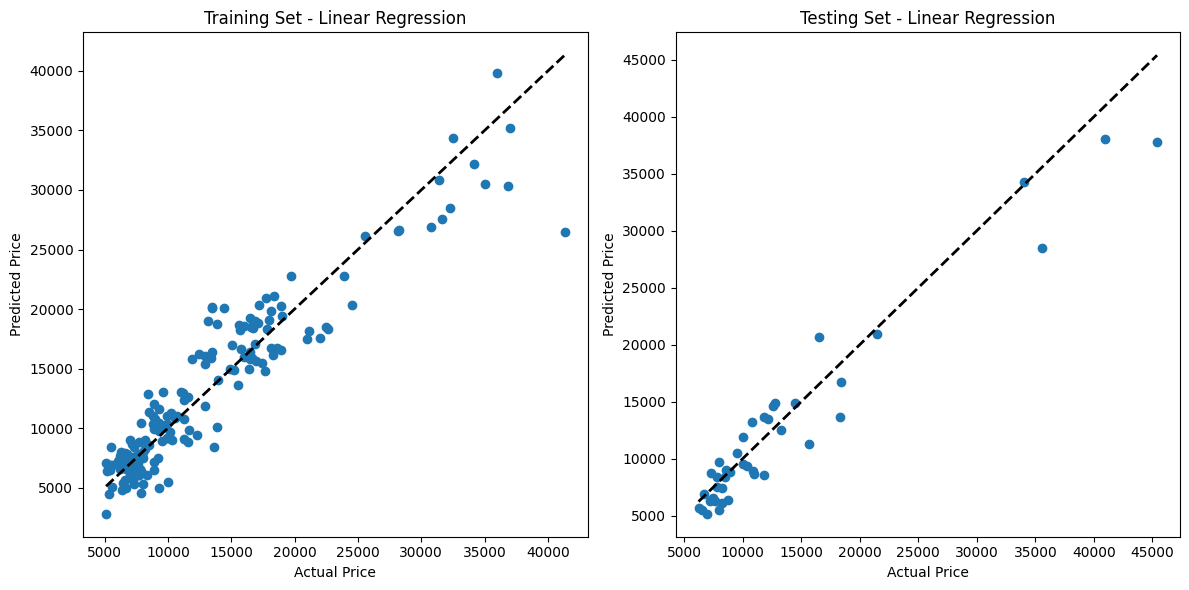

In [ ]:
# Predict on training and testing sets
y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Training set plot
axes[0].scatter(y_train, y_train_pred)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')
axes[0].set_title('Training Set - Linear Regression')

# Testing set plot
axes[1].scatter(y_test, y_test_pred)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[1].set_xlabel('Actual Price')
axes[1].set_ylabel('Predicted Price')
axes[1].set_title('Testing Set - Linear Regression')

plt.tight_layout()
plt.show()


# Polynomial Regression

In [ ]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scaler', RobustScaler()),
    ('model', LinearRegression())
])

In [ ]:
# Define the parameter grid ...

param_grid = {
    'poly__degree': [2, 3, 4, 5],
    'model__fit_intercept': [True, False]
}

In [ ]:
# Perform grid search ...

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('scaler', RobustScaler()),
                                       ('model', LinearRegression())]),
             param_grid={'model__fit_intercept': [True, False],
                         'poly__degree': [2, 3, 4, 5]},
             scoring='neg_mean_squared_error')

In [ ]:
print("Best parameters:", grid_search.best_params_)
print("Best model:", grid_search.best_estimator_)

Best parameters: {'model__fit_intercept': False, 'poly__degree': 2}
Best model: Pipeline(steps=[('poly', PolynomialFeatures()), ('scaler', RobustScaler()),
                ('model', LinearRegression(fit_intercept=False))])


In [ ]:
poly_model = grid_search.best_estimator_


In [ ]:
y_pred = poly_model.predict(X_test_scaled)

In [ ]:
# evaluate model

evaluate_all_models({'Polynomial Regression': poly_model}, X_train_scaled, X_test_scaled, y_train, y_test)

{'Polynomial Regression': {'R2 Train': 1.0,
  'R2 Test': -121.81862596991886,
  'MAE Train': 3.198925785510233e-10,
  'MAE Test': 43309.27565049434,
  'MSE Train': 2.3478533609988427e-19,
  'MSE Test': 10478812451.966745,
  'MAPE Train': 2.7369384829117747e-14,
  'MAPE Test': 2.947448879643218,
  'RMSE Train': 4.845465262489086e-10,
  'RMSE Test': 102366.07080457248}}

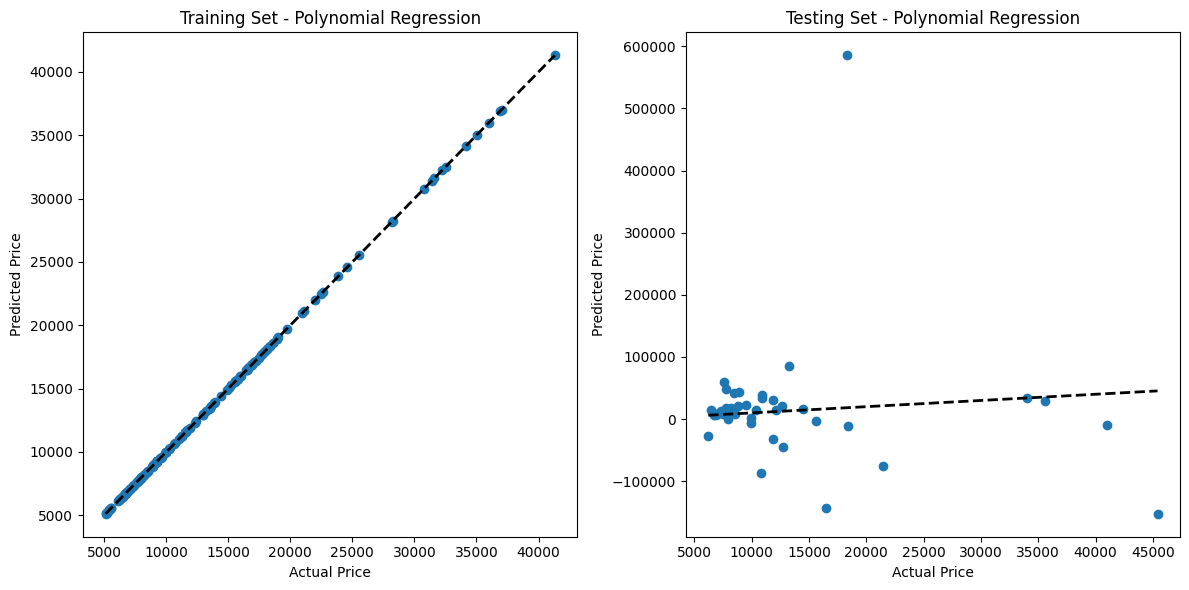

In [ ]:
# Predict on training and testing sets
y_train_pred = poly_model.predict(X_train_scaled)
y_test_pred = poly_model.predict(X_test_scaled)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Training set plot
axes[0].scatter(y_train, y_train_pred)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')
axes[0].set_title('Training Set - Polynomial Regression')

# Testing set plot
axes[1].scatter(y_test, y_test_pred)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[1].set_xlabel('Actual Price')
axes[1].set_ylabel('Predicted Price')
axes[1].set_title('Testing Set - Polynomial Regression')

plt.tight_layout()
plt.show()


# Ridge Regression

In [ ]:
polynomial_features = PolynomialFeatures(degree=2)

ridge = Ridge()

pipeline_ridge = Pipeline([
    ('poly', polynomial_features),
    ('scaler', RobustScaler()),
    ('ridge', ridge)
])

In [ ]:
param_grid_ridge = {
   'ridge__alpha': [0.1, 1.0, 10.0, 100.0, 1000.0],
   'ridge__fit_intercept': [True, False],
}

In [ ]:
grid_search_ridge = GridSearchCV(pipeline_ridge, param_grid_ridge, cv=5)

In [ ]:
grid_search_ridge.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('scaler', RobustScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.1, 1.0, 10.0, 100.0, 1000.0],
                         'ridge__fit_intercept': [True, False]})

In [ ]:
print("Best Ridge parameters:", grid_search_ridge.best_params_)

Best Ridge parameters: {'ridge__alpha': 10.0, 'ridge__fit_intercept': True}


In [ ]:
ridge_model = grid_search_ridge.best_estimator_

In [ ]:
y_pred = ridge_model.predict(X_test_scaled)

In [ ]:
# evaluate model

evaluate_all_models({'Ridge Regression': ridge_model}, X_train_scaled, X_test_scaled, y_train, y_test)

{'Ridge Regression': {'R2 Train': 0.9882400274340742,
  'R2 Test': 0.8888617963706116,
  'MAE Train': 592.8553129997642,
  'MAE Test': 2215.3211584668643,
  'MSE Train': 682751.4819475258,
  'MSE Test': 9482245.733363664,
  'MAPE Train': 0.05347771474814056,
  'MAPE Test': 0.1958774233161663,
  'RMSE Train': 826.2877718734107,
  'RMSE Test': 3079.325532217025}}

In [ ]:
# show weights

ridge_model.named_steps['ridge'].coef_

array([ 0.00000000e+00, -8.32239868e+01, -3.85740856e+02, -1.16069629e+00,
        1.62800823e+02,  5.17362168e+01, -1.30450468e+02, -1.03177175e+01,
        4.04512402e+01,  2.16792991e+02,  2.93149943e+02,  2.65708107e+02,
       -1.29857827e+01,  4.94660520e+02, -4.29680498e+01,  6.21831445e+01,
        3.51443391e+02,  2.39607593e+02,  2.62539953e+02, -2.52581395e+02,
       -4.43576386e+01,  5.44247681e+02,  2.24599434e+02, -4.49462726e+02,
       -5.31961640e+02, -1.10691102e+02, -1.25017262e+01, -4.08731943e+00,
       -6.97941052e+01, -1.75082283e+02, -7.99623274e+01, -2.37455843e+02,
        4.04512402e+01, -2.43519157e+02,  3.82527882e+00,  7.14779570e+00,
        2.63351544e+01,  6.46674286e+01,  1.25342022e+02, -2.06387097e+01,
       -2.24506702e+01, -5.56227515e+01,  3.13254089e+00, -1.75655014e+02,
       -2.01277789e+01,  3.93368834e+02,  2.06207873e+02, -8.23701543e+01,
       -1.08651499e+02,  3.91923290e+02,  8.41996792e+00,  1.29626842e+02,
       -6.29296126e+01,  

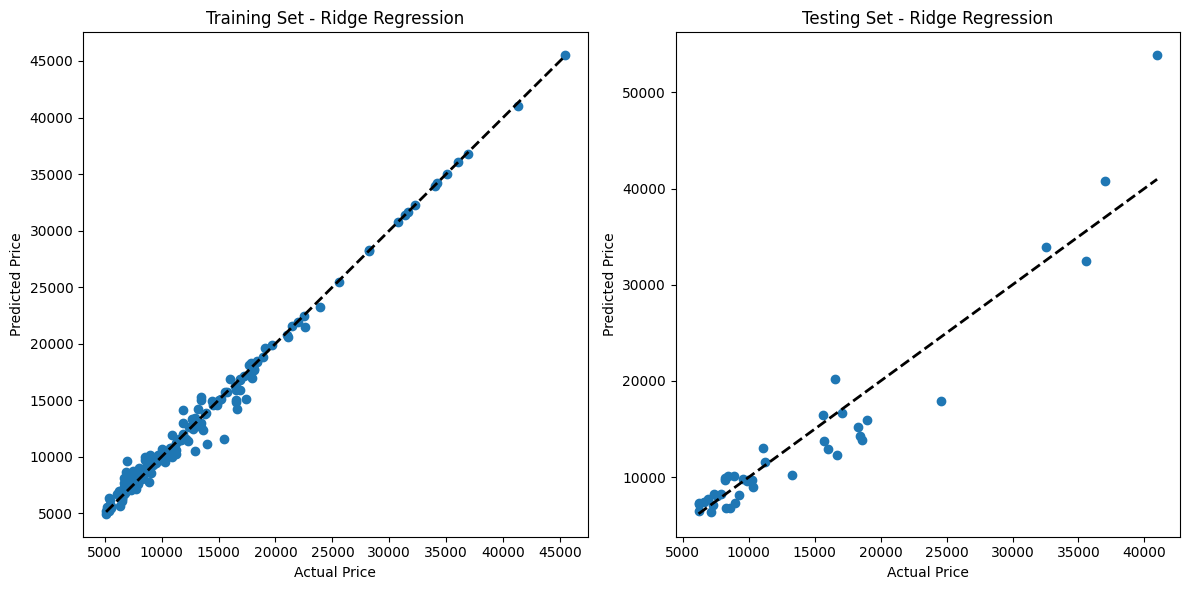

In [ ]:
# Predict on training and testing sets
y_train_pred = ridge_model.predict(X_train_scaled)
y_test_pred = ridge_model.predict(X_test_scaled)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Training set plot
axes[0].scatter(y_train, y_train_pred)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')
axes[0].set_title('Training Set - Ridge Regression')

# Testing set plot
axes[1].scatter(y_test, y_test_pred)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[1].set_xlabel('Actual Price')
axes[1].set_ylabel('Predicted Price')
axes[1].set_title('Testing Set - Ridge Regression')

plt.tight_layout()
plt.show()


# Lasso Regression

In [ ]:
polynomial_features = PolynomialFeatures(degree=2)

lasso = Lasso()

pipeline_lasso = Pipeline([
    ('poly', polynomial_features),
    ('scaler', RobustScaler()),
    ('lasso', lasso)
])

In [ ]:
param_grid_lasso = {
   'lasso__alpha': [0.1, 1.0, 10.0, 100.0, 1000.0],
   'lasso__fit_intercept': [True, False],
}

In [ ]:
grid_search_lasso = GridSearchCV(pipeline_lasso, param_grid_lasso, cv=5)

In [ ]:
grid_search_lasso.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.489e+06, tolerance: 8.448e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.650e+06, tolerance: 7.336e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.433e+06, tolerance: 7.869e

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('scaler', RobustScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': [0.1, 1.0, 10.0, 100.0, 1000.0],
                         'lasso__fit_intercept': [True, False]})

In [ ]:
print("Best lasso parameters:", grid_search_lasso.best_params_)

Best lasso parameters: {'lasso__alpha': 100.0, 'lasso__fit_intercept': True}


In [ ]:
lasso_model = grid_search_lasso.best_estimator_

In [ ]:
y_pred = lasso_model.predict(X_test_scaled)

In [ ]:
evaluate_all_models({'Lasso Regression': lasso_model}, X_train_scaled, X_test_scaled, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.378e+06, tolerance: 9.521e+05
  model = cd_fast.enet_coordinate_descent(


{'Lasso Regression': {'R2 Train': 0.9662074275156839,
  'R2 Test': 0.894340735020034,
  'MAE Train': 1032.3884004497095,
  'MAE Test': 2183.7379537907127,
  'MSE Train': 1961903.2963849162,
  'MSE Test': 9014785.931646045,
  'MAPE Train': 0.09156707053937135,
  'MAPE Test': 0.17779643138116538,
  'RMSE Train': 1400.6795837681493,
  'RMSE Test': 3002.4633106244687}}

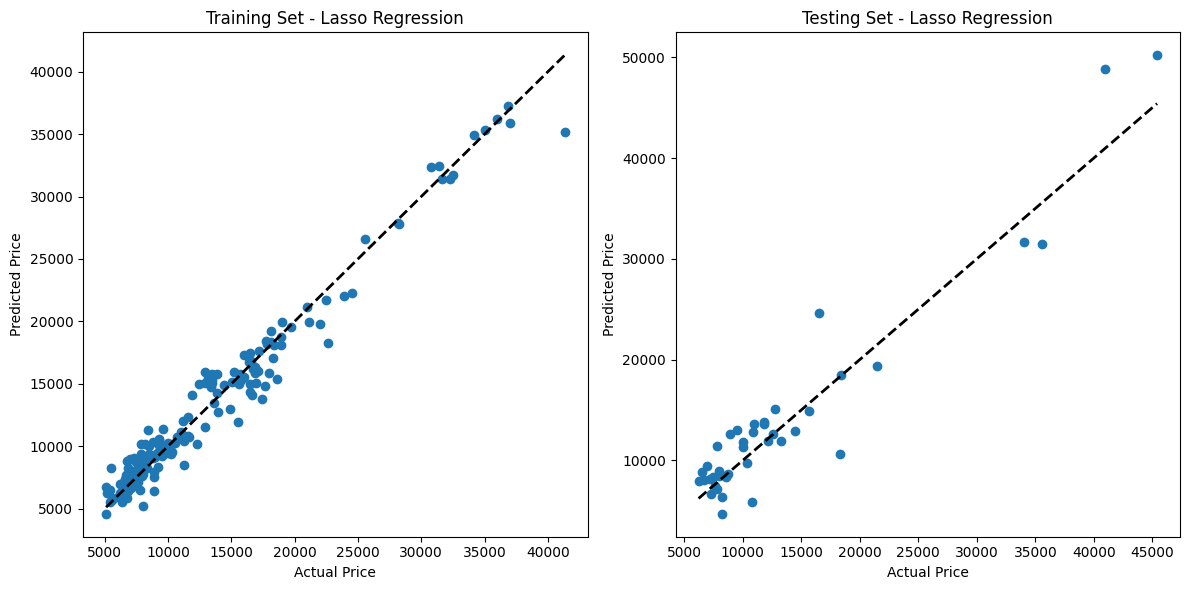

In [ ]:
# Predict on training and testing sets
y_train_pred = lasso_model.predict(X_train_scaled)
y_test_pred = lasso_model.predict(X_test_scaled)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Training set plot
axes[0].scatter(y_train, y_train_pred)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')
axes[0].set_title('Training Set - Lasso Regression')

# Testing set plot
axes[1].scatter(y_test, y_test_pred)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[1].set_xlabel('Actual Price')
axes[1].set_ylabel('Predicted Price')
axes[1].set_title('Testing Set - Lasso Regression')

plt.tight_layout()
plt.show()


In [ ]:
# show weights

lasso_model.named_steps['lasso'].coef_

array([ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.40423964e+01,
        0.00000000e+00,  3.98113817e+02, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  2.91127647e+03,  0.00000000e+00, -0.00000000e+00,
       -5.55732226e+02,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -1.02477365e+02,  0.00000000e+00, -0.00000000e+00,
       -7.31931516e+01,  1.25868045e+02,  1.36508301e+02, -0.00000000e+00,
       -0.00000000e+00,  6.75399525e+02, -0.00000000e+00,  0.00000000e+00,
       -7.72201145e+01, -

# Decision Tree

In [ ]:
DT_Reg = DecisionTreeRegressor()

param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search = GridSearchCV(estimator=DT_Reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

In [ ]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [ ]:
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

In [ ]:
evaluate_all_models({'Decision Tree': best_model}, X_train_scaled, X_test_scaled, y_train, y_test)

{'Decision Tree': {'R2 Train': 0.957408225404863,
  'R2 Test': 0.8248280579039897,
  'MAE Train': 1188.0709955610243,
  'MAE Test': 2100.5593284506317,
  'MSE Train': 2472760.6344815865,
  'MSE Test': 14945566.38762959,
  'MAPE Train': 0.09366314572498981,
  'MAPE Test': 0.13963414230224133,
  'RMSE Train': 1572.5013941111742,
  'RMSE Test': 3865.9496100737774}}

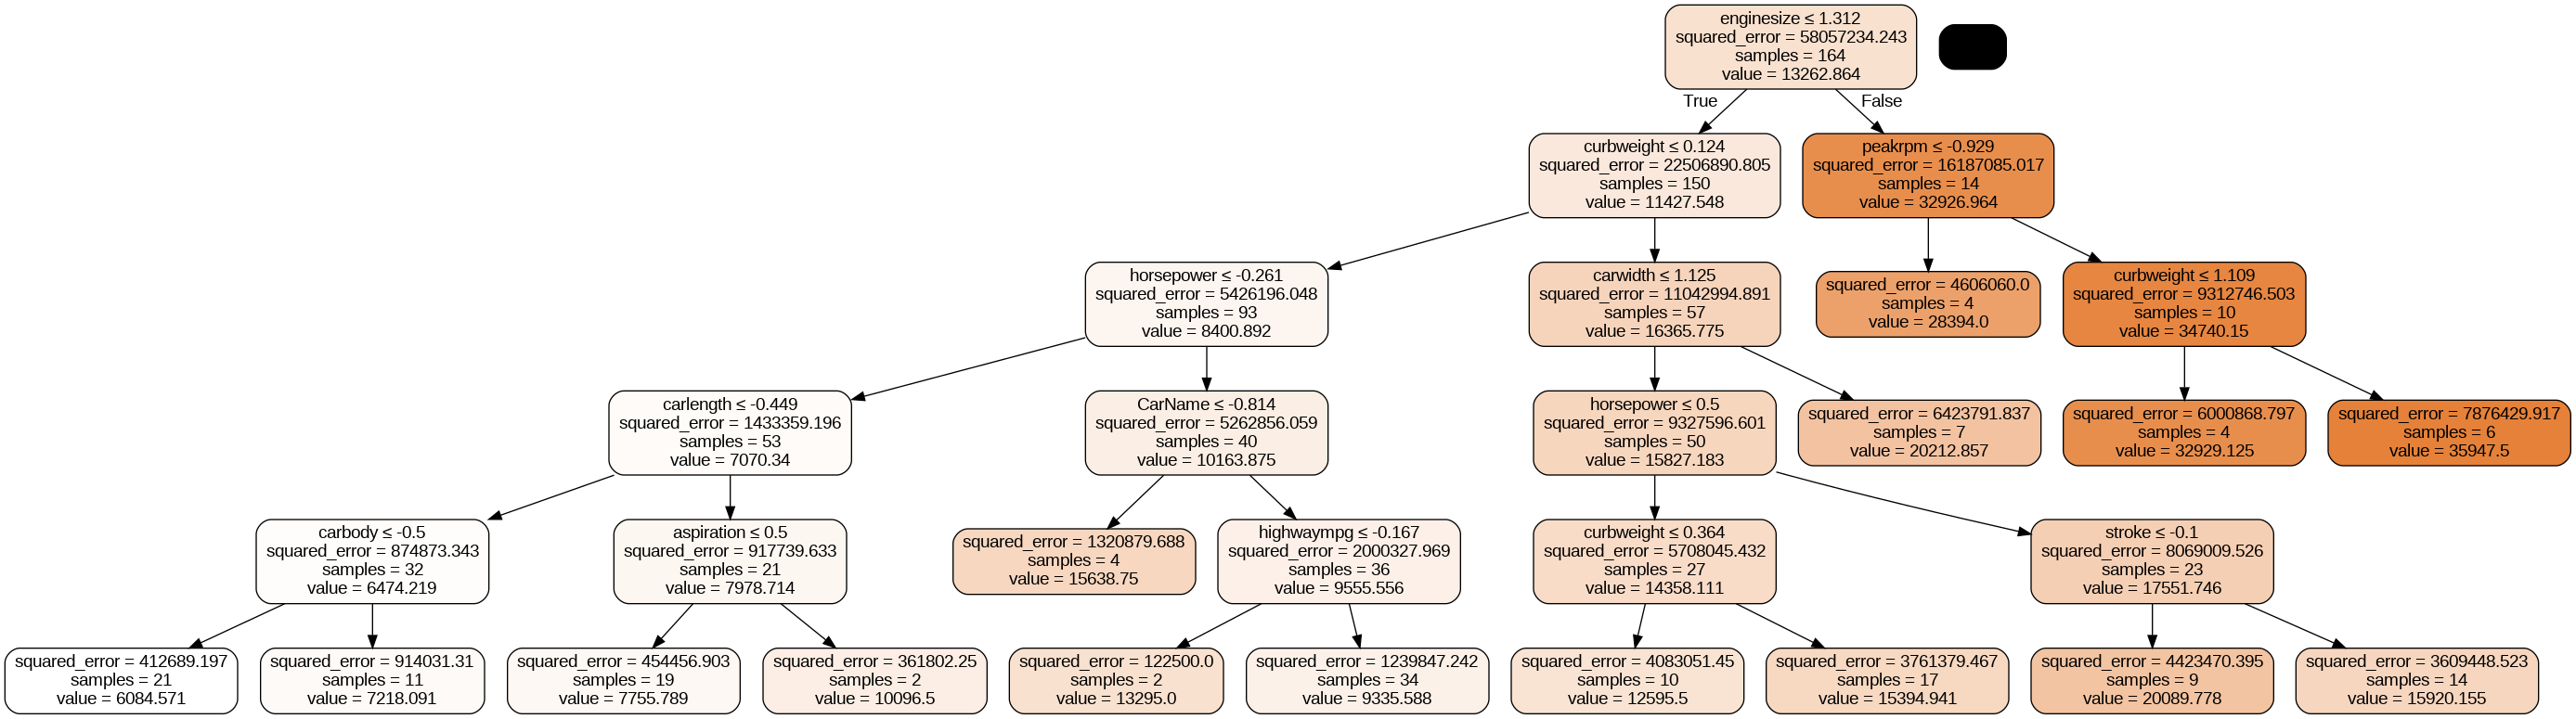

In [ ]:
dot_data = export_graphviz(best_model, out_file=None, feature_names=X_train.columns, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

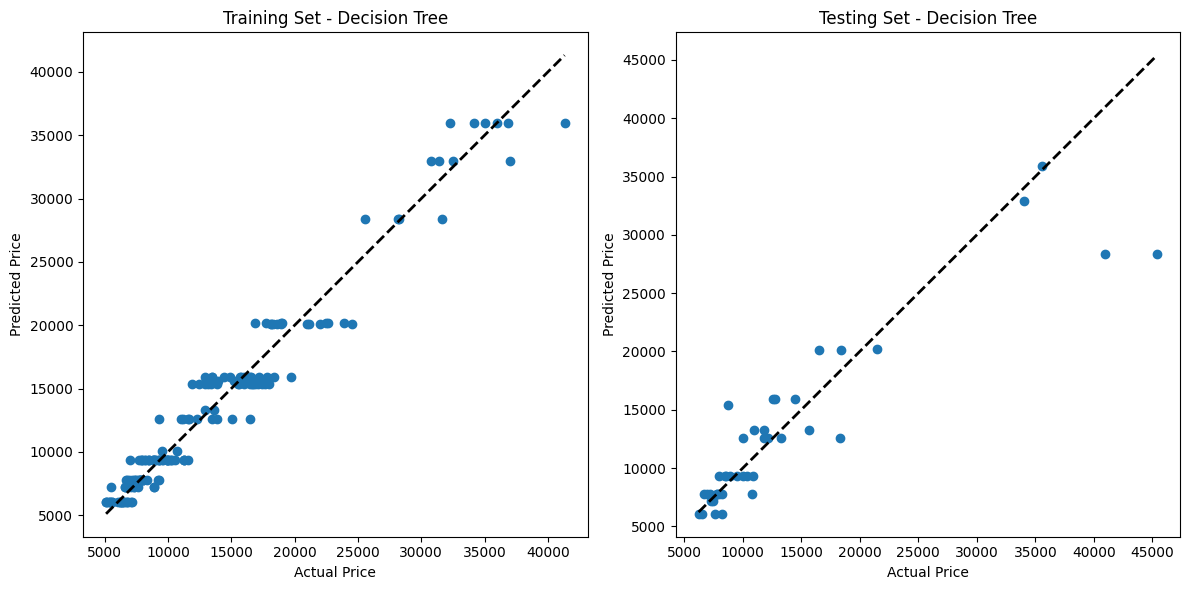

In [ ]:
# Predict on training and testing sets
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Training set plot
axes[0].scatter(y_train, y_train_pred)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')
axes[0].set_title('Training Set - Decision Tree')

# Testing set plot
axes[1].scatter(y_test, y_test_pred)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[1].set_xlabel('Actual Price')
axes[1].set_ylabel('Predicted Price')
axes[1].set_title('Testing Set - Decision Tree')

plt.tight_layout()
plt.show()


# Random Forest

In [ ]:
RF_Reg = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search = GridSearchCV(estimator=RF_Reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

In [ ]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
RF_model = grid_search.best_estimator_
y_pred = RF_model.predict(X_test_scaled)

In [ ]:
evaluate_all_models({'Random Forest': RF_model}, X_train_scaled, X_test_scaled, y_train, y_test)

{'Random Forest': {'R2 Train': 0.9790107594756853,
  'R2 Test': 0.9211507715389001,
  'MAE Train': 763.4163997802742,
  'MAE Test': 1507.9703969696202,
  'MSE Train': 1218577.2536962393,
  'MSE Test': 6727369.488960987,
  'MAPE Train': 0.05670061260081514,
  'MAPE Test': 0.10177021357491066,
  'RMSE Train': 1103.8918668493936,
  'RMSE Test': 2593.717310919019}}

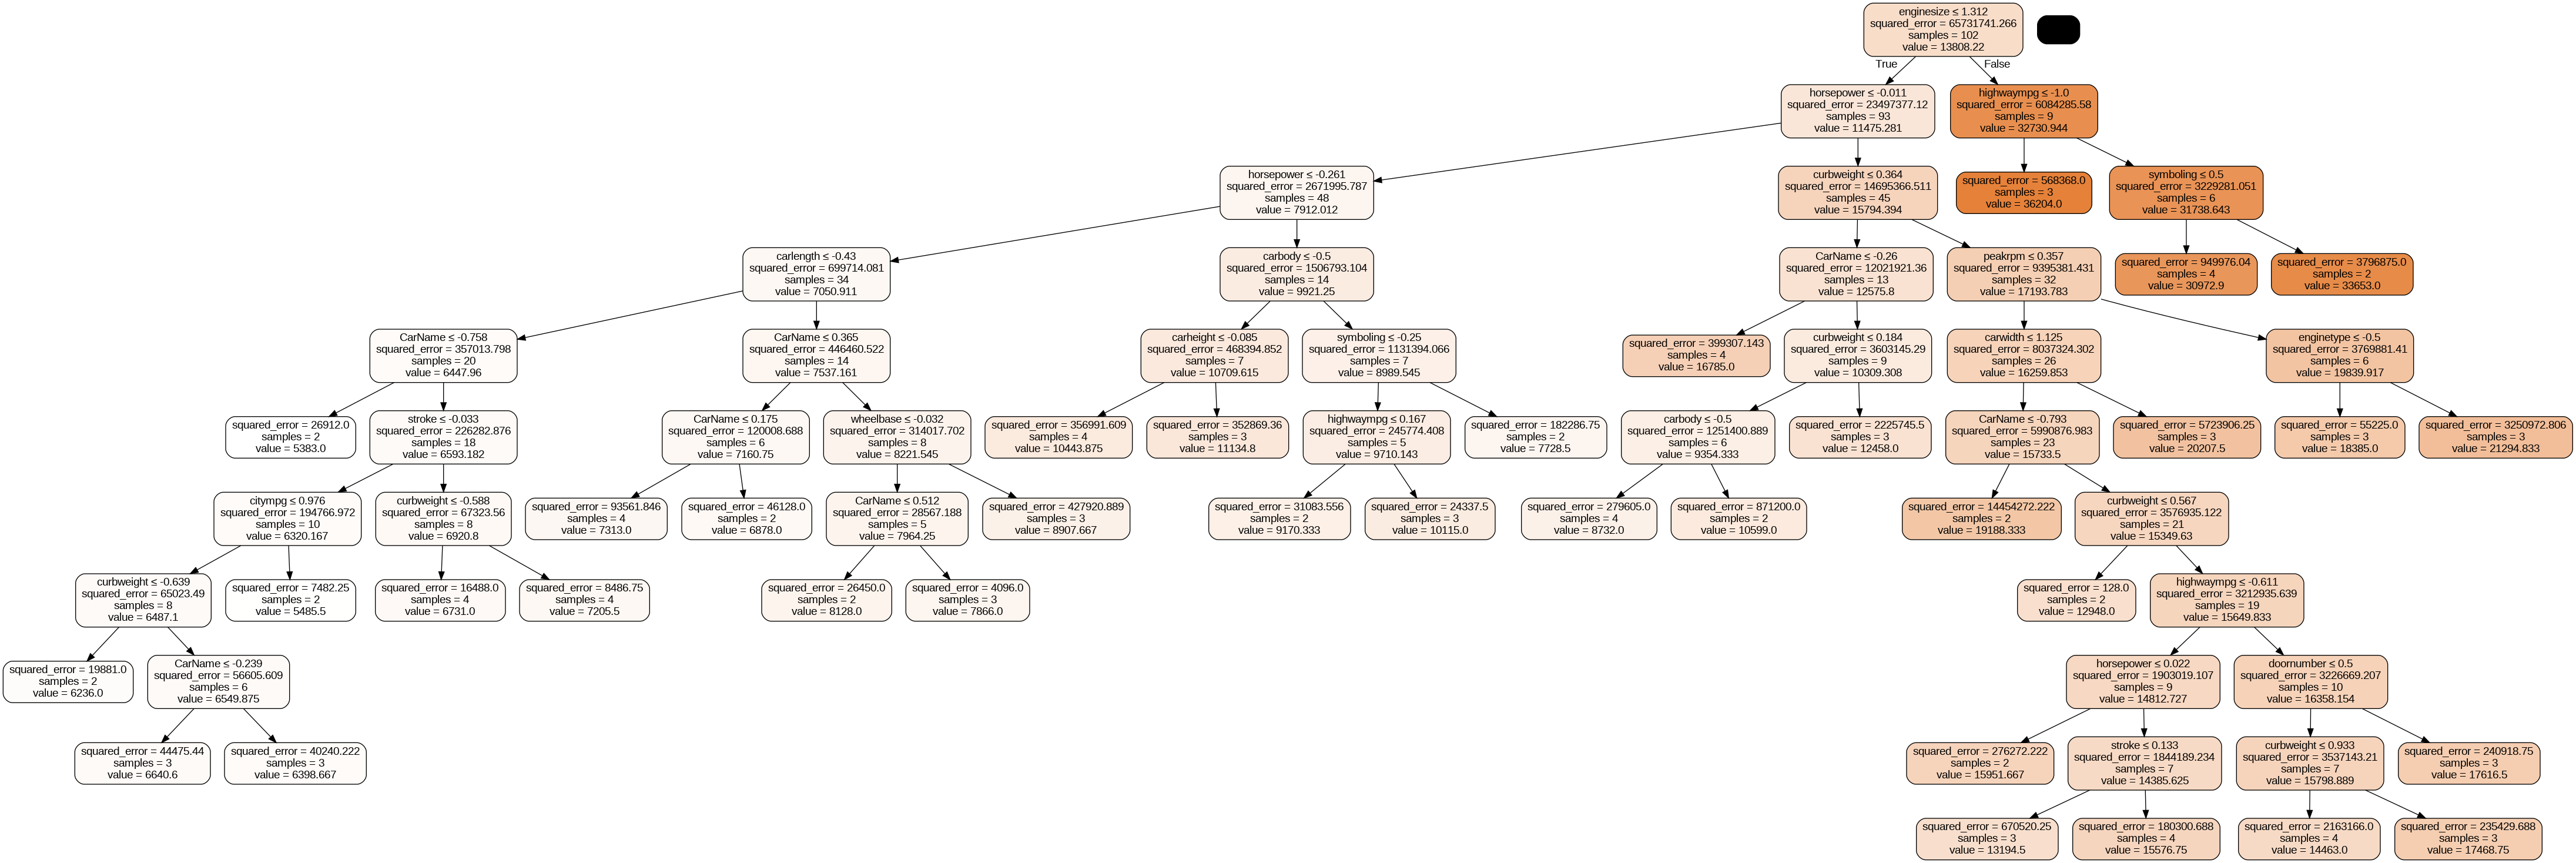

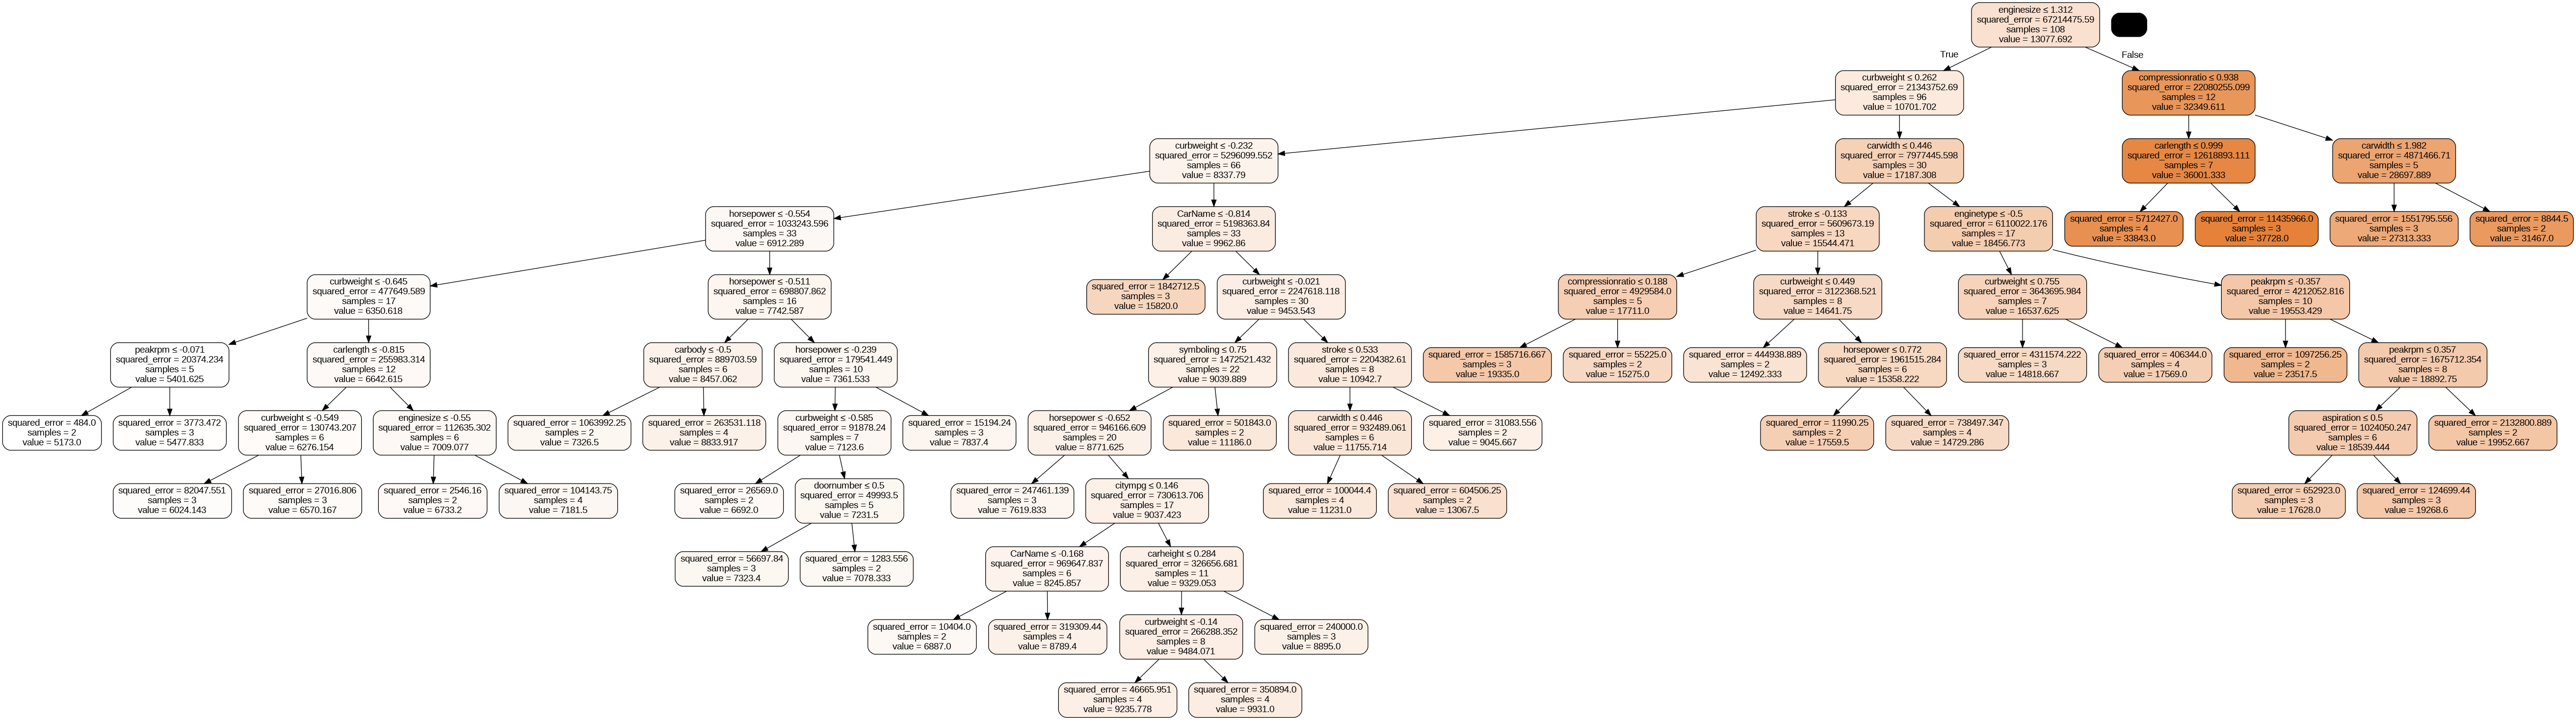

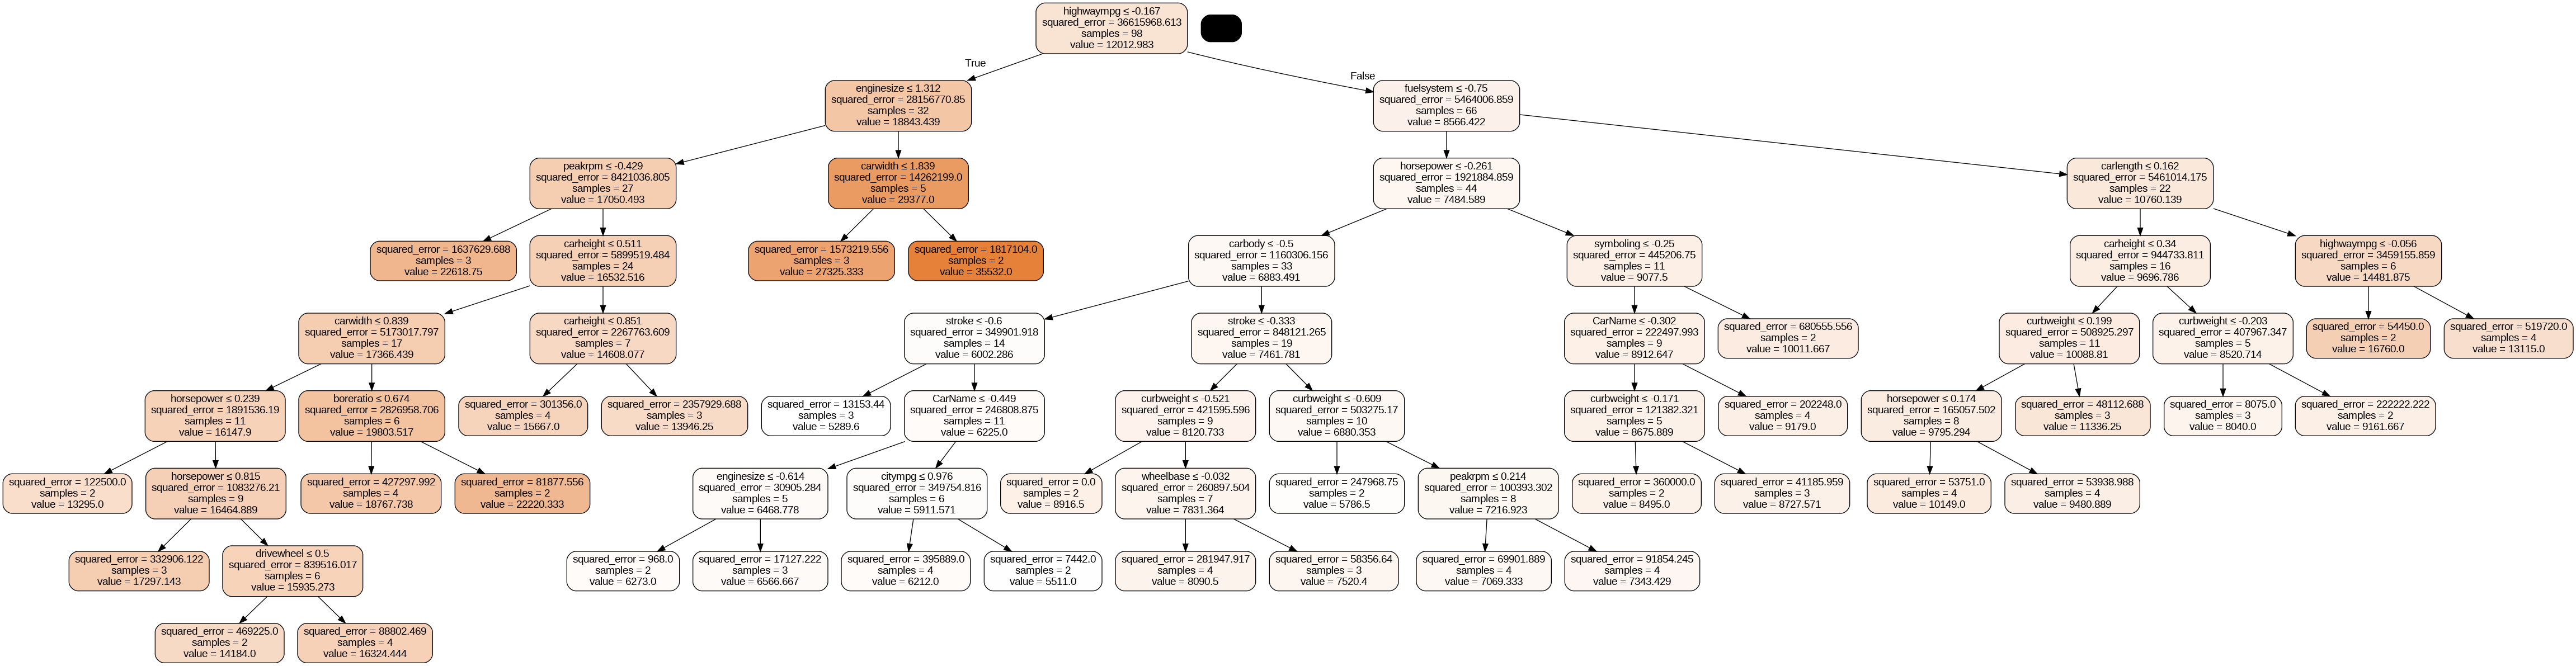

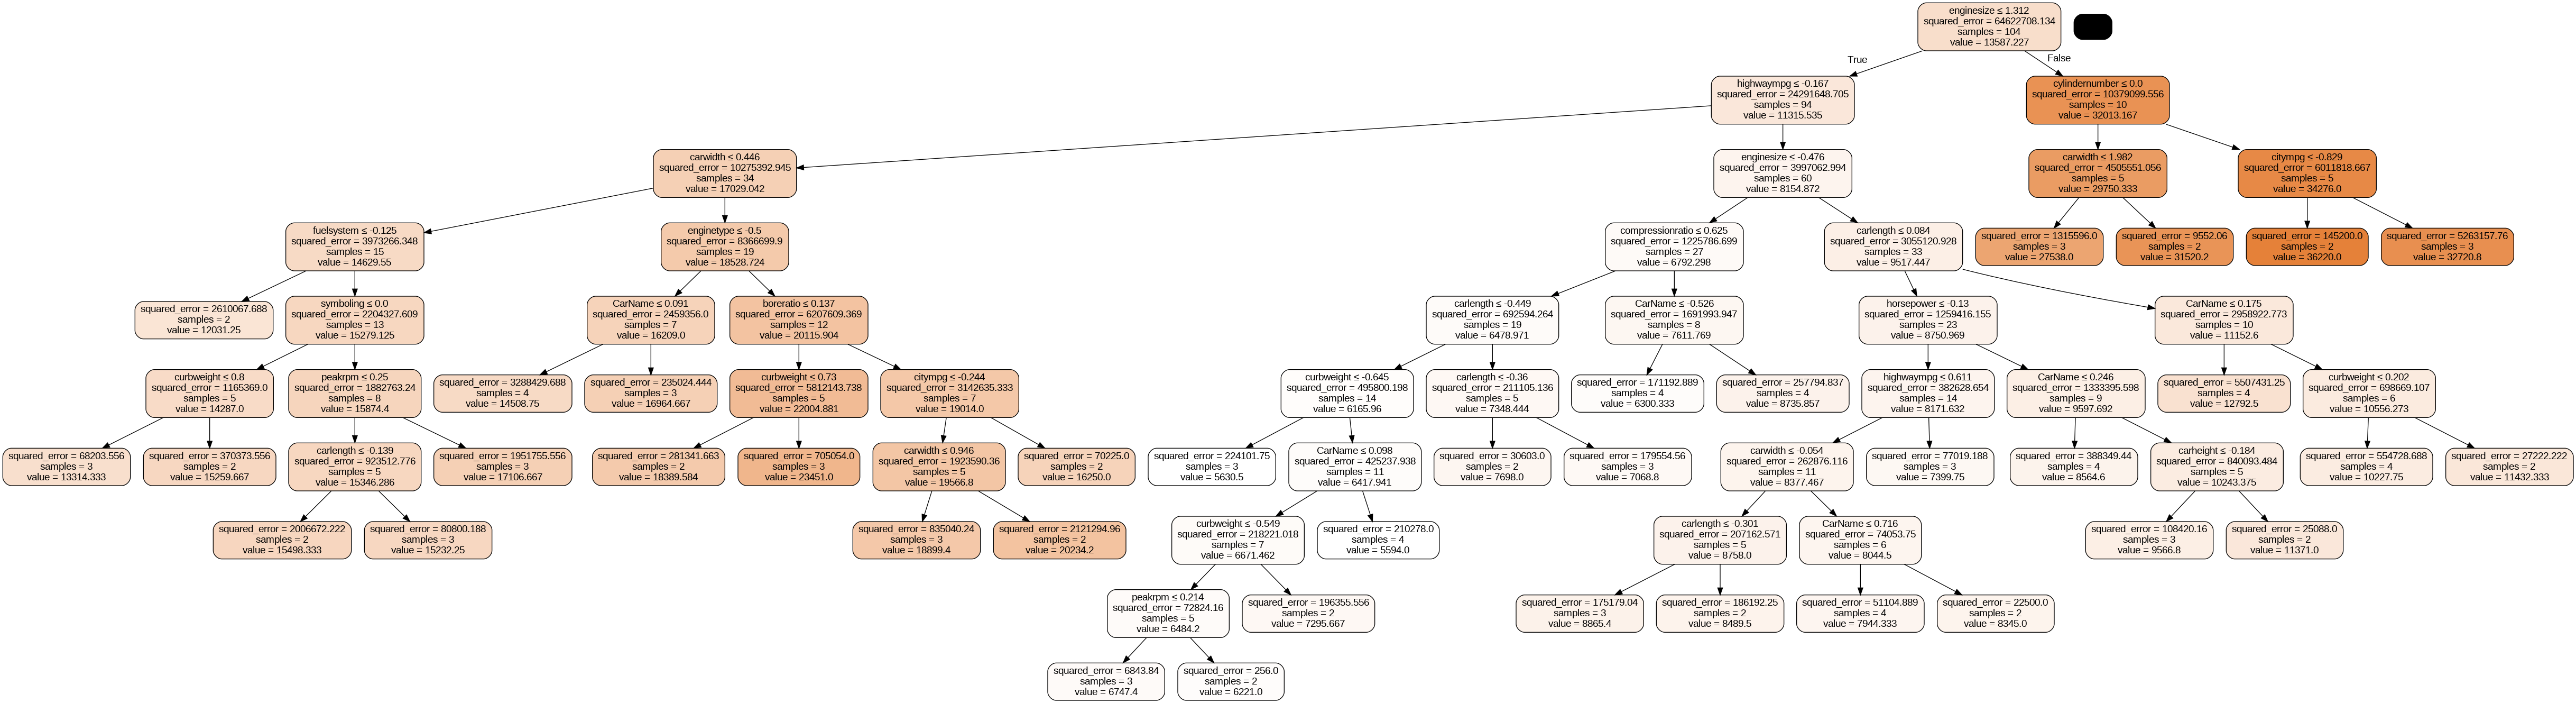

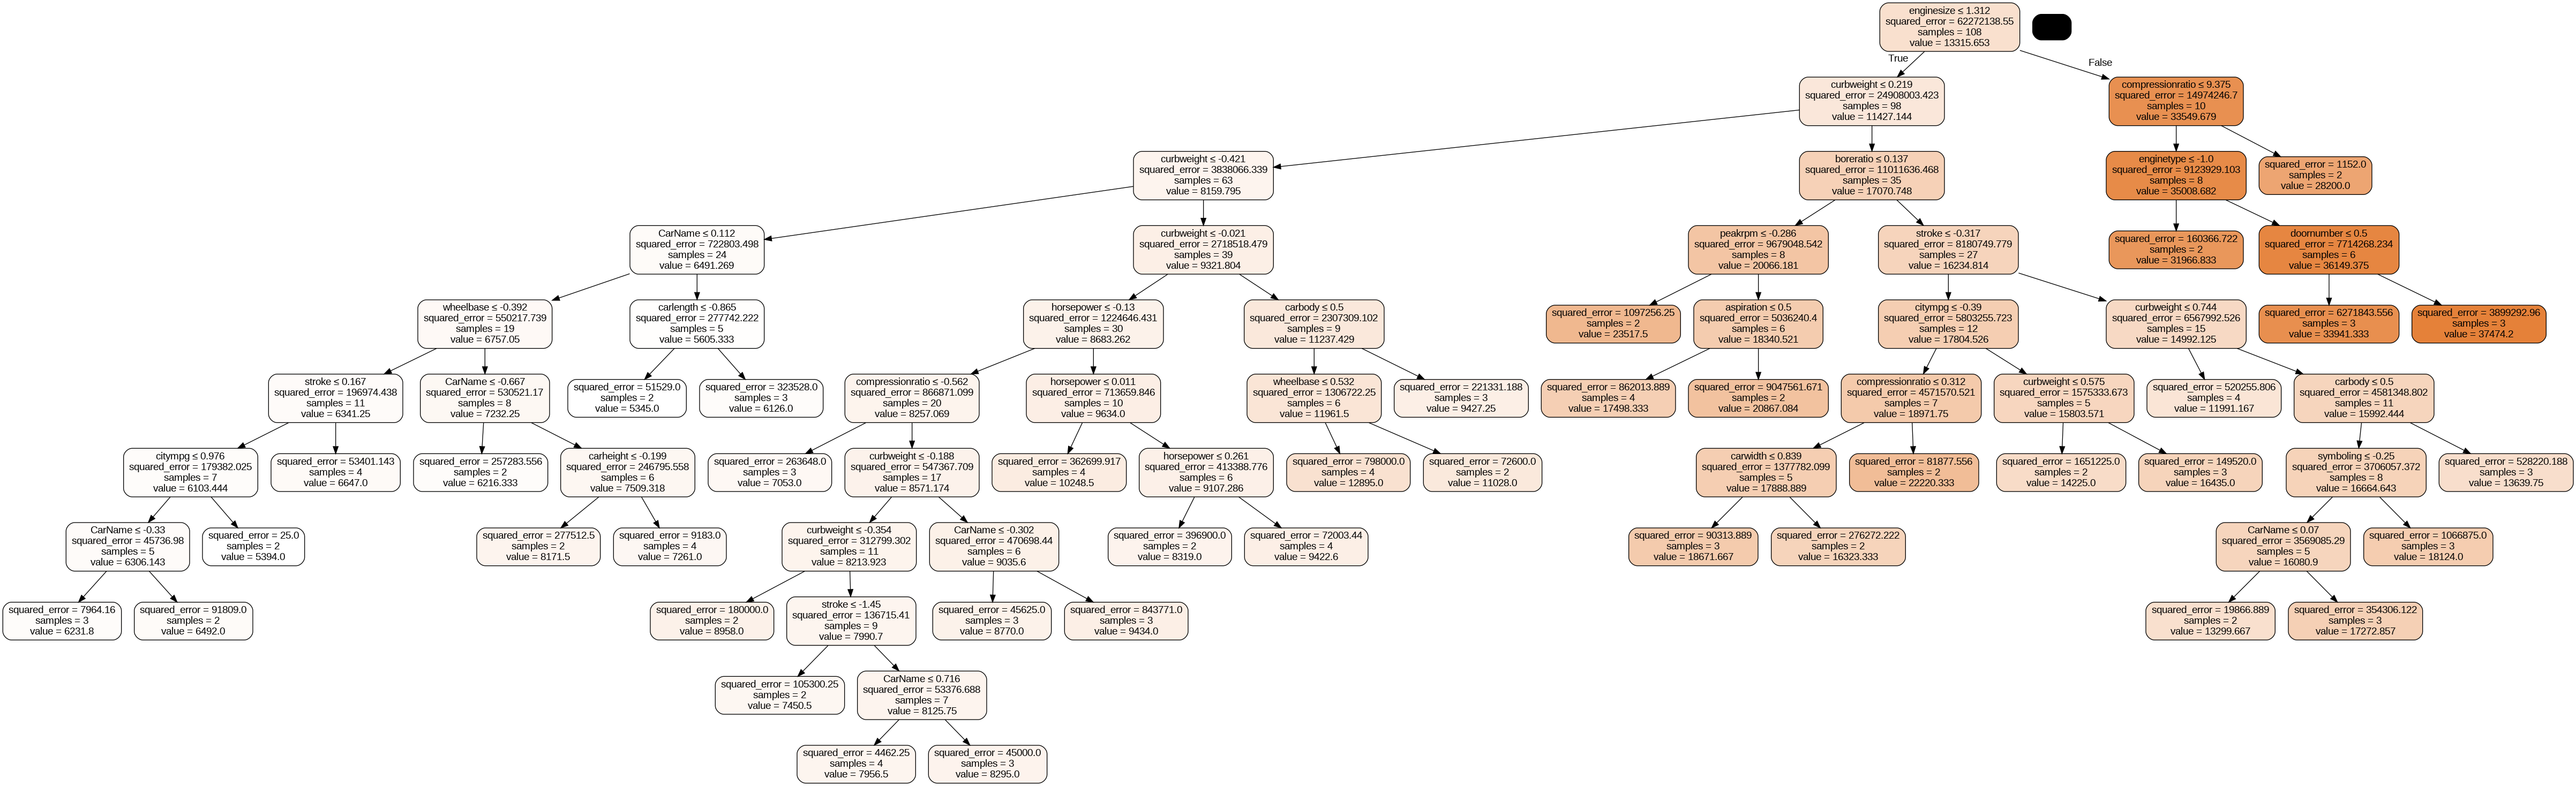

In [ ]:
estimators = RF_model.estimators_

# Iterate through a few trees and visualize them
for i in range(5):  # Visualize the first 3 trees, for example
    tree = estimators[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               rounded=True,
                               special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    display(Image(graph.create_png()))


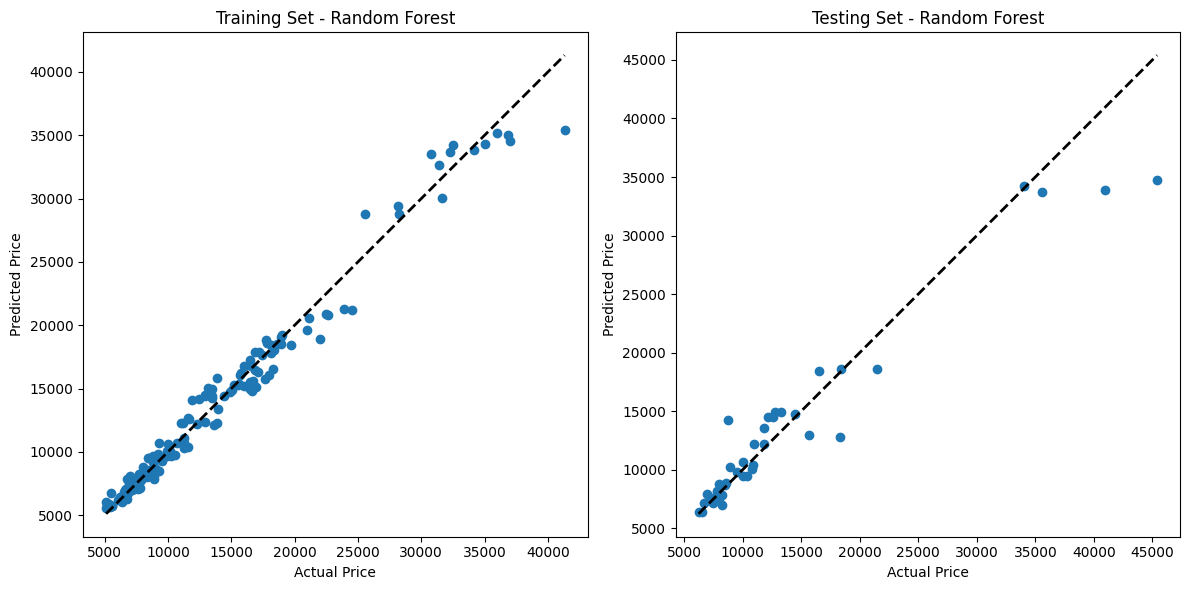

In [ ]:
# Predict on training and testing sets
y_train_pred = RF_model.predict(X_train_scaled)
y_test_pred = RF_model.predict(X_test_scaled)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Training set plot
axes[0].scatter(y_train, y_train_pred)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')
axes[0].set_title('Training Set - Random Forest')

# Testing set plot
axes[1].scatter(y_test, y_test_pred)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[1].set_xlabel('Actual Price')
axes[1].set_ylabel('Predicted Price')
axes[1].set_title('Testing Set - Random Forest')

plt.tight_layout()
plt.show()


# **Conclusion**




#**Linear Regression & Polynomial Regression**
##Linear regression evaluation

Evaluation | Result
------------|--------------
R2-Score Train|0.88
R2-Score Test| 0.92
MSE Train |6860822.9
MSE Test | 6205818.5
RMSE Train | 2619.3
RMSE Test |2491.1
MAE Train |1937.5
MAE Test | 1836.9
MAPE Train |15.9%
MAPE Test |14.3%


##Polynomial Regression evaluation  

Evaluation| Result
---------------|--------------------
R2-Score Train|1.0
R2-Score Test |-121.8
MSE Train |2.3478533609988427e-19
MSE Test |10478812451.9
RMSE Train |4.845465262489086e-10
RMSE Test |102366.07
MAE Train|3.198925785510233e-10
MAE Test |43309.27
MAPE Train |0.00000000000274%
MAPE Test |294.74%

________________________________________________________________________________
#**Ridge Regression & Lasso Regression**
##Ridge Regression Evaloution

Evaloution | Result
----------|------------
R2-Score Train  | 0.98
R2-Score Test  |0.88
MSE Train |682751.4
MSE Test |9482245.7
RMSE Train |826.2
RMSE Test |3079.3
MAE Train | 592.8
MAE Test | 2215.3
MAPE Train |5.35%
MAPE Test  | 19.59%








## Lasso Regression Evaloution

Evaloution |Result
---------------|-----------------
R2-Score Train|0.96
R2-Score Test|0.89
MSE Train |1961903.2
MSE Test |9014785.9
RMSE Train |1400.6
RMSE Test |3002.4
MAE Train |1032.3
MAE Test |2183.7
MAPE Train|9.16%
MAPE Test |17.78%

________________________________________________________________________________
#**Decision Tree & Random Forest**
##Decision Tree Evaloution

Evaloution | Result
------------|-------------
R2-Score Train  | 0.95
R2-Score Test |0.82
MSE Train |2472760.6
MSE Test |14945566.3
RMSE Train  |1572.5
RMSE Test |3865.9
MAE Train |1188.0
MAE Test |2100.5
MAPE Train |9.37%
MAPE Test  |13.96%








## Random Forest Evaloution

 Evaloution | Result
---------------|-----------------
R2-Score Train|0.97
R2-Score Test |0.92
MSE Train | 1218577.2
MSE Test |6727369.4
RMSE Train| 1103.8
RMSE Test | 2593.7
MAE Train | 763.4
MAE Test | 1507.9
MAPE Train |5.67%
MAPE Test |10.18%


# **Summary of the results obtained**

Models  | Conclusion
-------------------|------------------
**Linear Regression**|**performs well on both training and test data, indicating a good fit without overfitting**.
|
|
**Polynomial Regression**|**shows perfect performance on training data but fails drastically on test data, indicating severe overfitting.**
|
|
**Ridge Regression** |**performs well on both training and test data, with a slight increase in error on the test set, indicating a good balance between bias and variance.**
|
|
**Lasso Regression**|**also performs well, with slightly higher errors compared to Ridge Regression, but still maintains a good balance between bias and variance**
|
|
**Decision Tree** |**shows good performance on training data but higher errors on test data, indicating potential overfitting.**
|
|
**Random Forest** |**performs very well on both training and test data, indicating a robust model with good generalization capabilities.**


# summary :

# ▪ Linear Regression and Random Forest models :
#### show the best performance on test data, with Random Forest having a slight edge in terms of error metrics.
________________________________________________________________________________

# ▪ Polynomial Regression:
#### suffers from severe overfitting
________________________________________________________________________________
# ▪ Ridge and Lasso Regression :
#### provide a good balance between bias and variance.
________________________________________________________________________________
# ▪ Decision Tree :
#### shows signs of overfitting but still performs reasonably well.